In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [9]:
data.head(10)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


In [5]:
data.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [6]:
data.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [7]:
data.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
data.isnull().sum()

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

Text(0.5, 1.0, 'Automobile Sales Year by Year')

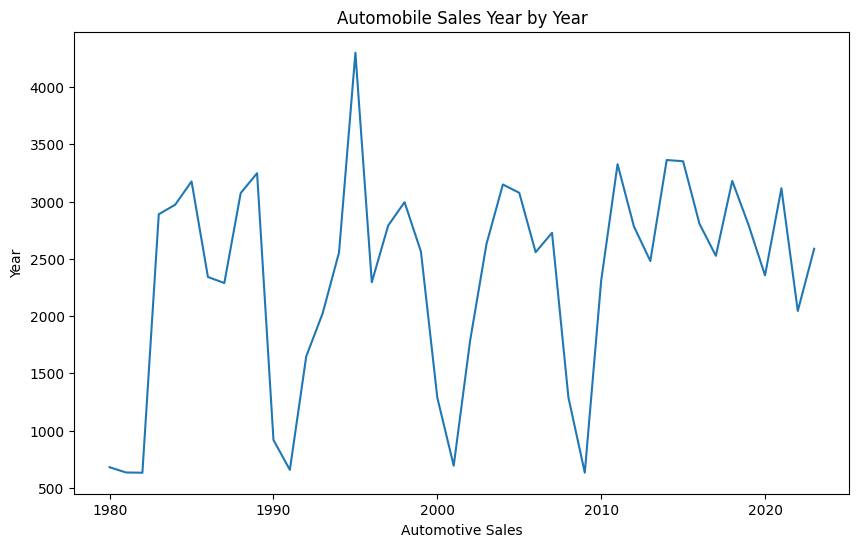

In [10]:
df_sales = data.groupby(data['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
df_sales.plot(kind='line')
plt.xlabel('Automotive Sales')
plt.ylabel('Year')
plt.title('Automobile Sales Year by Year')

Text(0.5, 1.0, 'Automobile Sales Year by Year')

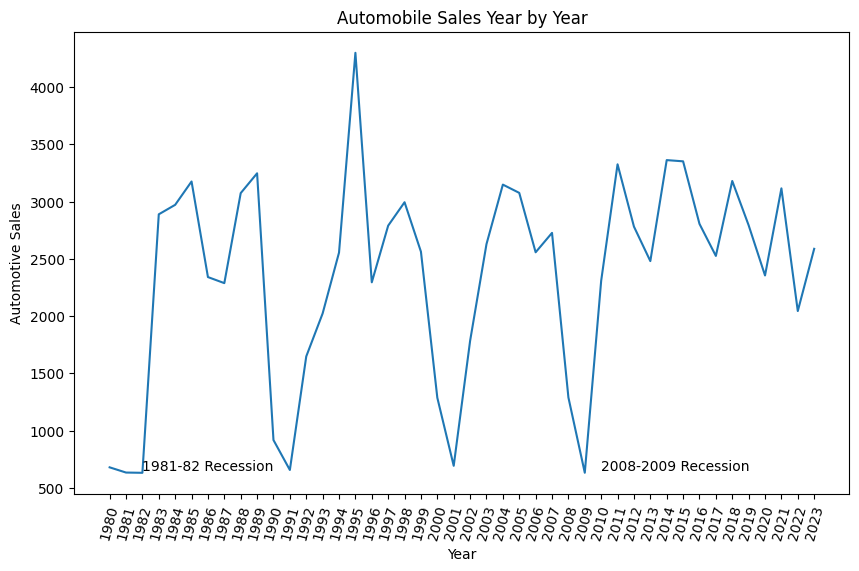

In [15]:
df_sales = data.groupby(data['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
df_sales.plot(kind='line')
plt.ylabel('Automotive Sales')
plt.xlabel('Year')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.text(2010, 650, '2008-2009 Recession')
plt.title('Automobile Sales Year by Year')    

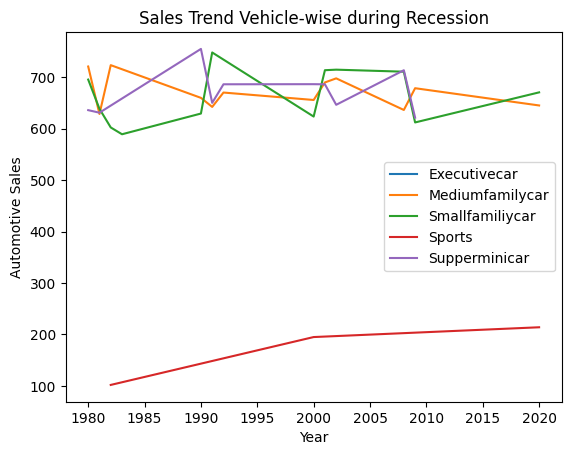

In [16]:
df_rec = data[data['Recession']==1]
df_Mline = df_rec.groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year',inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automotive Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()



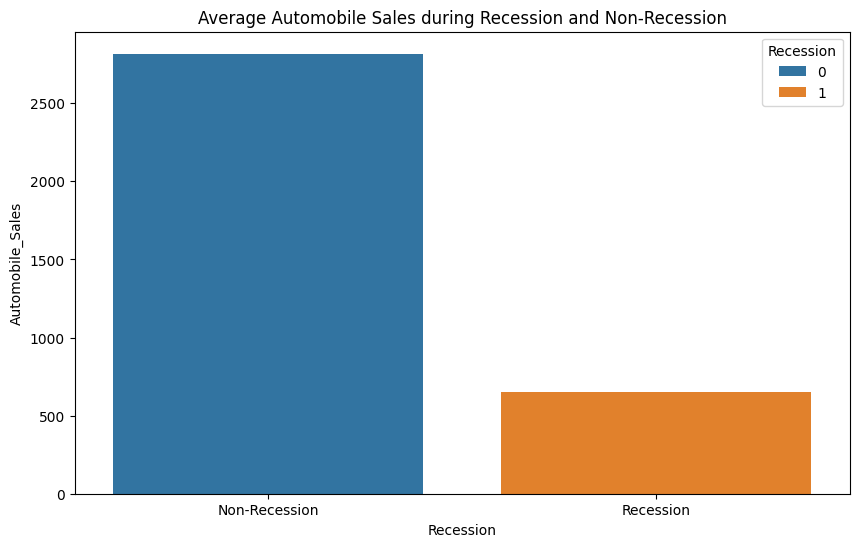

In [22]:
new_df = data.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

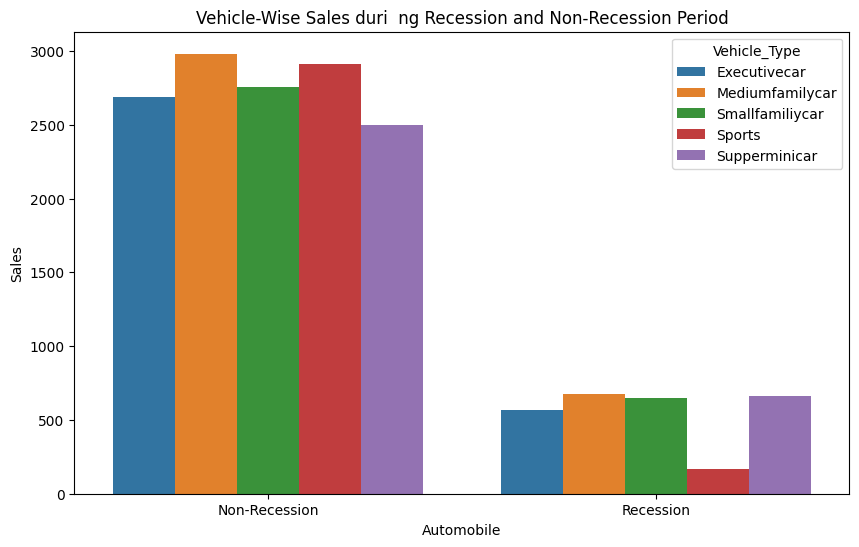

In [31]:
recession_data = data[data['Recession'] == 1]
dd=data.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Automobile')
plt.ylabel('Sales')
plt.title('Vehicle-Wise Sales duri  ng Recession and Non-Recession Period')
plt.show()

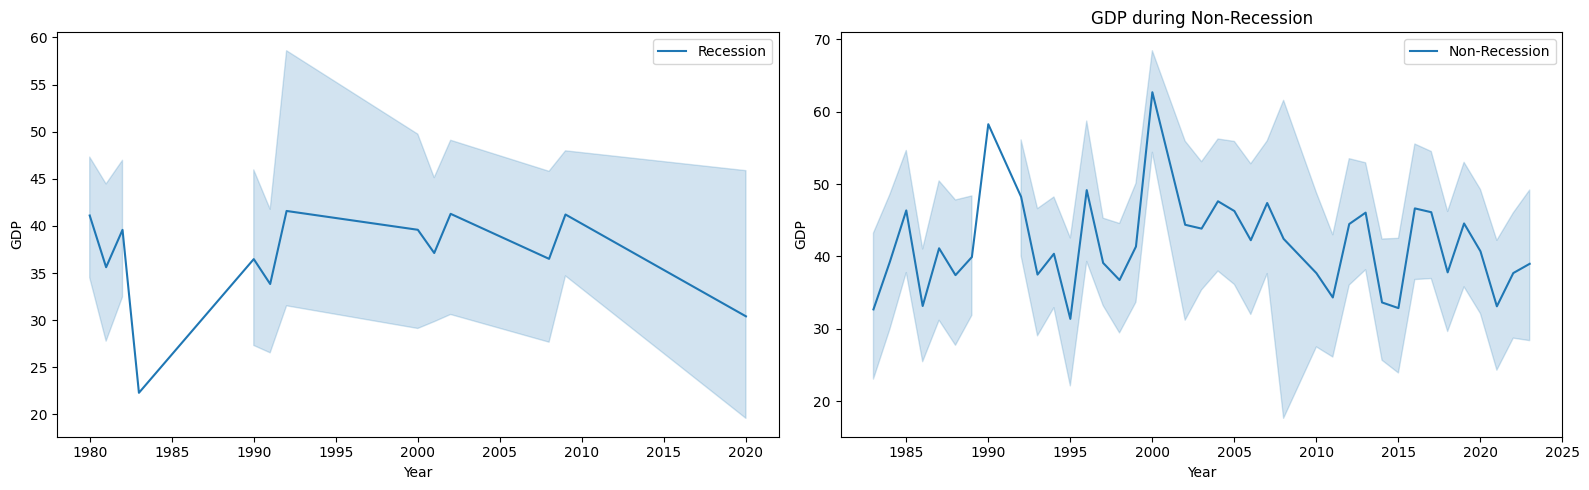

In [34]:
rc_data = data[data['Recession']== 1]
nrc_data = data[data['Recession']== 0]

fig = plt.figure(figsize=(16,5))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

sns.lineplot(x='Year',y='GDP',data=rc_data,label='Recession',ax=ax0)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP during Recession')

sns.lineplot(x='Year',y='GDP',data=nrc_data,label='Non-Recession',ax=ax1)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP during Non-Recession')

plt.tight_layout()
plt.show()

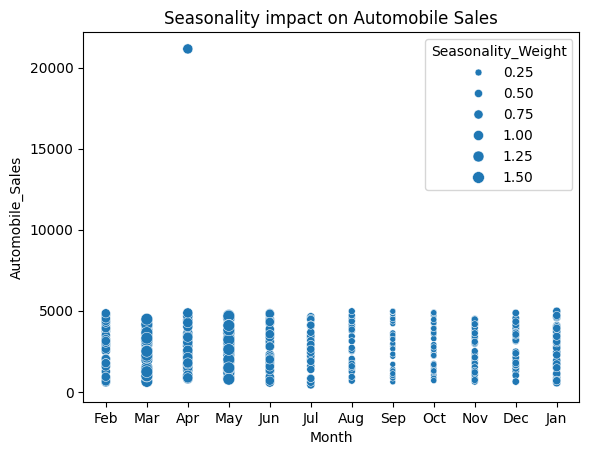

In [35]:
size = nrc_data ['Seasonality_Weight']
sns.scatterplot(data=nrc_data, x='Month', y='Automobile_Sales', size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

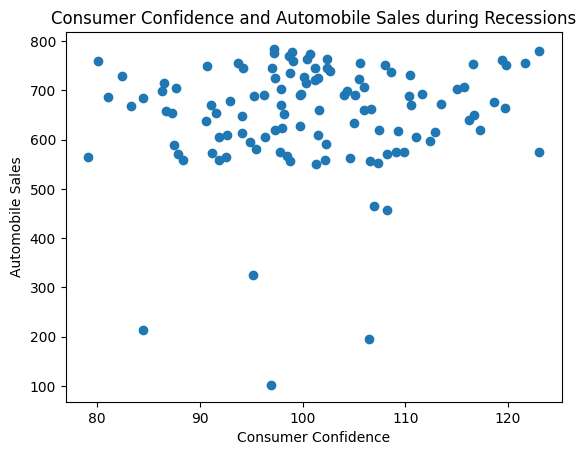

In [36]:
plt.scatter(rc_data['Consumer_Confidence'],rc_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

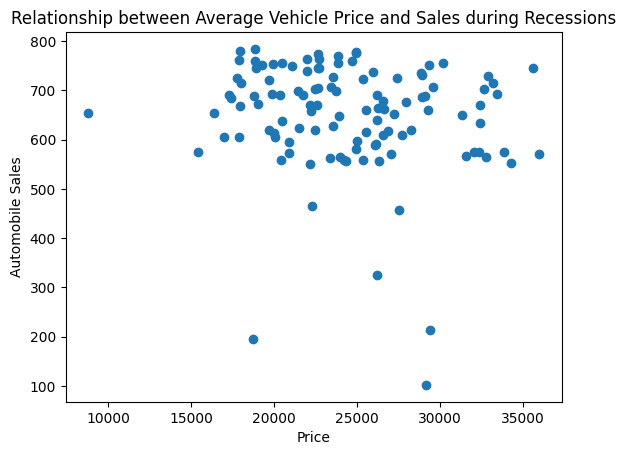

In [39]:
plt.scatter(rc_data['Price'],rc_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

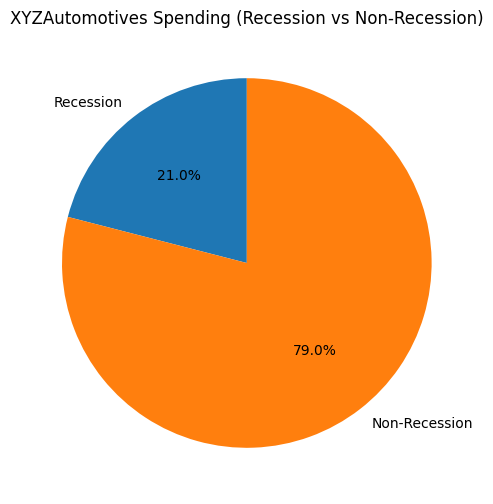

In [41]:
rae_data = rc_data['Advertising_Expenditure'].sum()
nrae_data = nrc_data['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [rae_data, nrae_data]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('XYZAutomotives Spending (Recession vs Non-Recession)')
plt.show()


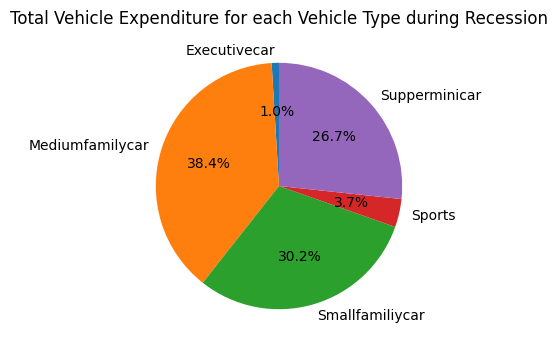

In [43]:
VTexpenditure = rc_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(20,4))
size = VTexpenditure.values
label = VTexpenditure.index
plt.pie(size,labels=label,autopct='%1.1f%%', startangle=90)
plt.title('Total Vehicle Expenditure for each Vehicle Type during Recession')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\3416567655.py:1: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rc_data, x='unemployment_rate', y='Automobile_Sales',


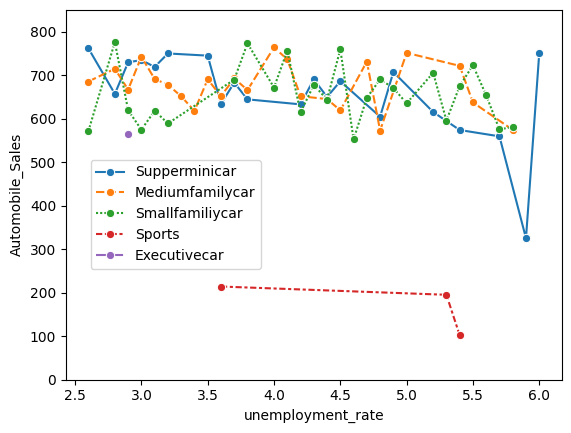

In [45]:
sns.lineplot(data=rc_data, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))